In [13]:
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],0,:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

ref_ = 'ConservativeNoLimiter'
reconstruction = 'ConservativeNoLimiter'
reconstruction2 = 'ConservativeMinMod'

fs = [1, 2, 4]

err_inf = [[], []]
err_L1 = [[], []]
err_L2 = [[], []]

for f in fs:
    bnx = 50
    bny = 50

    new_path = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/ReferenceData/SlopedChannel_new_{}_{}x{}-1.h5'.format(reconstruction, bnx*f, bny*f)
    # old_path = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/ReferenceData/SlopedChannel_new_{}_{}x{}-1.h5'.format(reconstruction2, bnx*f, bny*f)
    ref_path = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/ReferenceData/SlopedChannel_ref_{}_{}x{}-1.h5'.format(ref_, bnx*f, bny*f)

    file = h5py.File(new_path, mode='r')
    new_data = np.array(file['data'][:, 0, :, :])
    times = np.array(file['times'])
    dx = file['data'].attrs['cell_size']
    xlower = file['data'].attrs['xlower']
    file.close()

    # file = h5py.File(old_path, mode='r')
    # old_data = np.array(file['data'][:, 0, :, :])
    # file.close()

    file = h5py.File(ref_path, mode='r')
    ref_data = np.array(file['data'][:, 0, :, :])
    file.close()

    def ComputeError(ref_data, last_step):
        err_inf = np.max(np.abs(ref_data - last_step))
        err_1 = np.sum(np.abs(ref_data - last_step)) / np.count_nonzero(ref_data)
        err_2 = np.sqrt(np.sum((ref_data - last_step)**2)) / np.count_nonzero(ref_data)
        return (err_inf, err_1, err_2)

    new_last_step = new_data[new_data.shape[0] - 1, :, :]
    # old_last_step = old_data[old_data.shape[0] - 1, :, :]

    (inf, L1, L2) = ComputeError(ref_data, new_last_step)
    err_inf[0].append(inf)
    err_L1[0].append(L1)
    err_L2[0].append(L2)
    # (inf, L1, L2) = ComputeError(ref_data, old_last_step)
    # err_inf[1].append(inf)
    # err_L1[1].append(L1)
    # err_L2[1].append(L2)

print(err_inf)
print(err_L1)
print(err_L2)

def ConvergenceRate(xs):
    return (0.5 * np.array(xs[0])[0:-1] / np.array(xs[0])[1:], 0.5 * np.array(xs[1])[0:-1] / np.array(xs[1])[1:])

print(ConvergenceRate(err_inf))

[[0.0008177430312497069, 0.0005343429706525793, 0.0003112739544075538], []]
[[6.817870002378655e-05, 2.8480773878454823e-05, 1.1432689253779732e-05], []]
[[7.278751375498917e-06, 1.9281286205379577e-06, 4.910369799439262e-07], []]
(array([0.76518554, 0.85831622]), array([], dtype=float64))


[0. 0.]
[0.1  0.07]
(2, 100, 70)


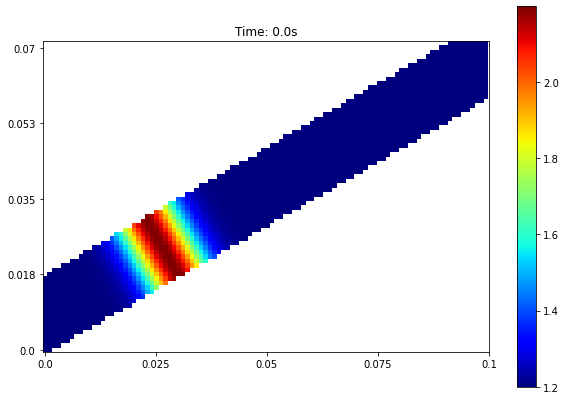

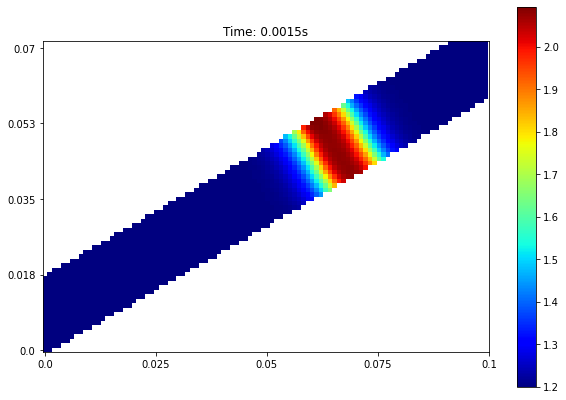

In [6]:
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],0,:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

ref_ = 'ConservativeMinMod'
# reconstruction = 'ConservativeNoGradient'
reconstruction = 'ConservativeMinMod'

f = 2
bnx = 50
bny = 35

new_path = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/ReferenceData/SlopedChannel_new_{}_{}x{}-1.h5'.format(reconstruction, bnx*f, bny*f)
file = h5py.File(new_path, mode='r')
new_data = np.array(file['data'][:, 0, :, :])
times = np.array(file['times'])
dx = file['data'].attrs['cell_size']
xlower = file['data'].attrs['xlower']
file.close()

ref_path = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/ReferenceData/SlopedChannel_ref_{}_{}x{}-1.h5'.format(ref_, bnx*f, bny*f)
file = h5py.File(ref_path, mode='r')
ref_data = np.array(file['data'][:, 0, :, :])
file.close()

nx = [new_data.shape[1], new_data.shape[2]]
xupper = xlower + dx * nx

vmin = None #0.4
vmax = None #2.0

outpath = '/srv/public/Maikel/FiniteVolumeSolver/extra/{}'.format(reconstruction)
os.makedirs(outpath, exist_ok=True)


print(xlower)
print(xupper)
print(new_data.shape)

# for n in range(new_data.shape[0]):
for n in range(0,2):
    rho =  np.abs(np.array(new_data[n,:,:]) - ref_data) # np.array(new_data[n,:,:]) # 
    # drho_dx = np.gradient(rho, 0)
    # drho = np.sqrt(drho_dx * drho_dx + drho_dy * drho_dy)
    # u = rhou / rho
    nticks = 5

    real_x = np.around(np.linspace(xlower[0], xupper[0], nticks, endpoint=True), 3)
    real_y = np.around(np.linspace(xlower[1], xupper[1], nticks, endpoint=True), 3)

    dxt = [int(nx[0] / (nticks - 1)), int(nx[1] / (nticks - 1))]
    xticks = list(range(0, nx[0] + 1, dxt[0]))
    yticks = list(range(0, nx[1] + 1, dxt[1]))
    
    imdata = np.reshape(rho, [nx[1], nx[0]])# np.log(1.0 + np.reshape(rho, [nx[1], nx[0]]))
    imdata = np.where(imdata == 0.0, np.nan, imdata)
    f, ax = plt.subplots(figsize=(10, 7))
    if vmin is not None:
        im = ax.imshow(imdata, origin='lower', vmin=vmin, vmax=vmax, interpolation='none')
    else:
        im = ax.imshow(imdata, origin='lower', cmap='jet', interpolation='none')
    plt.colorbar(im)
    ax.set_xticks(xticks)
    ax.set_xticklabels(real_x)
    ax.set_yticks(yticks)
    ax.set_yticklabels(real_y)
    ax.set_title('Time: {:.3}s'.format(times[n]))
    plt.show()
    f.savefig('{}/Density_{}.png'.format(outpath, n))
    # f.clf()